#### Imports

In [1]:
# Install the statsmodels package


from statsmodels.tsa.ar_model import AutoReg # AR model
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,median_absolute_error
import matplotlib.pyplot as plt
from arima_models_family import ARIMAFamily
import constant
import warnings

warnings.filterwarnings("ignore")

#### Read data (Assume data is clean and processed)


In [2]:
data = pd.read_parquet(constant.file_path)

In [3]:
data

,open
Date,
2024-04-29,634.40
2024-04-30,624.20
2024-05-01,627.60
2024-05-02,624.20
2024-05-03,633.70
...,...
2025-04-24,404.00
2025-04-25,400.90
2025-04-26,402.45


In [4]:
# object initialization
obj_1 = ARIMAFamily(data)

# Split the data into train and test sets
train_df,test_df = obj_1.train_test_split(data,'count',20)

In [5]:

sub_train_df,val_df = obj_1.train_test_split(train_df,'count',20)

In [6]:
val_df

,open
Date,
2025-03-20,388.850000
2025-03-21,393.000000
2025-03-22,390.925000
2025-03-23,390.925000
2025-03-24,398.000000
2025-03-25,402.850000
2025-03-26,390.300000
2025-03-27,382.000000
2025-03-28,388.400000


### Model Fitting

## 1) Auto Reg

In [ ]:

obj_1.fit_model(AutoReg,train_df,lags=3) # AR model

In [ ]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse      mape  \
 2025-04-09   354.599808  349.000000  528.043777  22.979203  4.726536   
 2025-04-10   353.011850  351.000000  528.043777  22.979203  4.726536   
 2025-04-11   353.652731  355.000000  528.043777  22.979203  4.726536   
 2025-04-12   354.879628  353.000000  528.043777  22.979203  4.726536   
 2025-04-13   355.809683  353.000000  528.043777  22.979203  4.726536   
 2025-04-14   356.689396  353.666667  528.043777  22.979203  4.726536   
 2025-04-15   357.594352  367.000000  528.043777  22.979203  4.726536   
 2025-04-16   358.492177  370.000000  528.043777  22.979203  4.726536   
 2025-04-17   359.377404  380.000000  528.043777  22.979203  4.726536   
 2025-04-18   360.254047  375.000000  528.043777  22.979203  4.726536   
 2025-04-19   361.122480  375.000000  528.043777  22.979203  4.726536   
 2025-04-20   361.982342  376.666667  528.043777  22.979203  4.726536   
 2025-04-21   362.833721  386.100000  528.043777  2

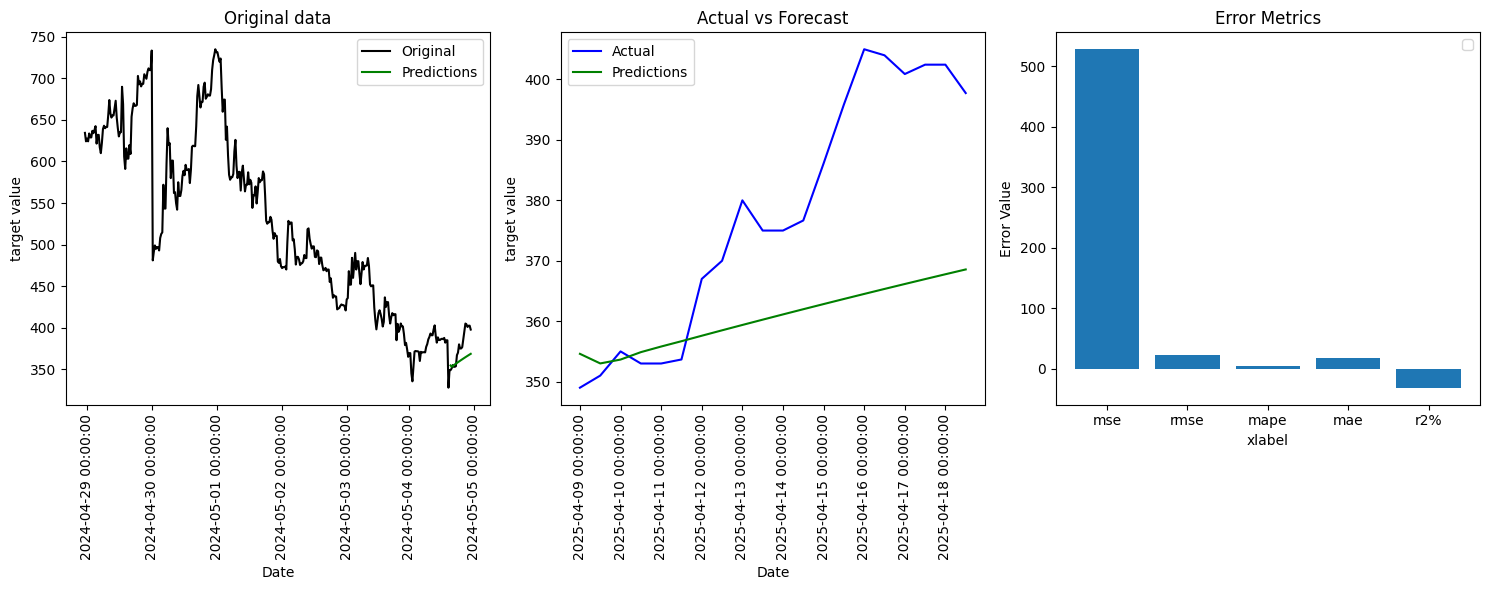

In [8]:

obj_1.data_plotting()

In [ ]:
# obj_1.forecasting("count",steps = 30)

## 2) ARIMA MODEL ERROR TERM CONSIDERATION 

In [11]:
obj_1.fit_model(ARIMA,train_df,order=(0,0,5)) #  Moving Average model

In [8]:
obj_1.predict(train_df, test_df)

(            predictions      actual           mse        rmse       mape  \
 2025-04-09   386.572648  349.000000  20108.427306  141.804186  36.623077   
 2025-04-10   427.614066  351.000000  20108.427306  141.804186  36.623077   
 2025-04-11   477.163964  355.000000  20108.427306  141.804186  36.623077   
 2025-04-12   518.397303  353.000000  20108.427306  141.804186  36.623077   
 2025-04-13   537.119564  353.000000  20108.427306  141.804186  36.623077   
 2025-04-14   531.035109  353.666667  20108.427306  141.804186  36.623077   
 2025-04-15   531.035109  367.000000  20108.427306  141.804186  36.623077   
 2025-04-16   531.035109  370.000000  20108.427306  141.804186  36.623077   
 2025-04-17   531.035109  380.000000  20108.427306  141.804186  36.623077   
 2025-04-18   531.035109  375.000000  20108.427306  141.804186  36.623077   
 2025-04-19   531.035109  375.000000  20108.427306  141.804186  36.623077   
 2025-04-20   531.035109  376.666667  20108.427306  141.804186  36.623077   

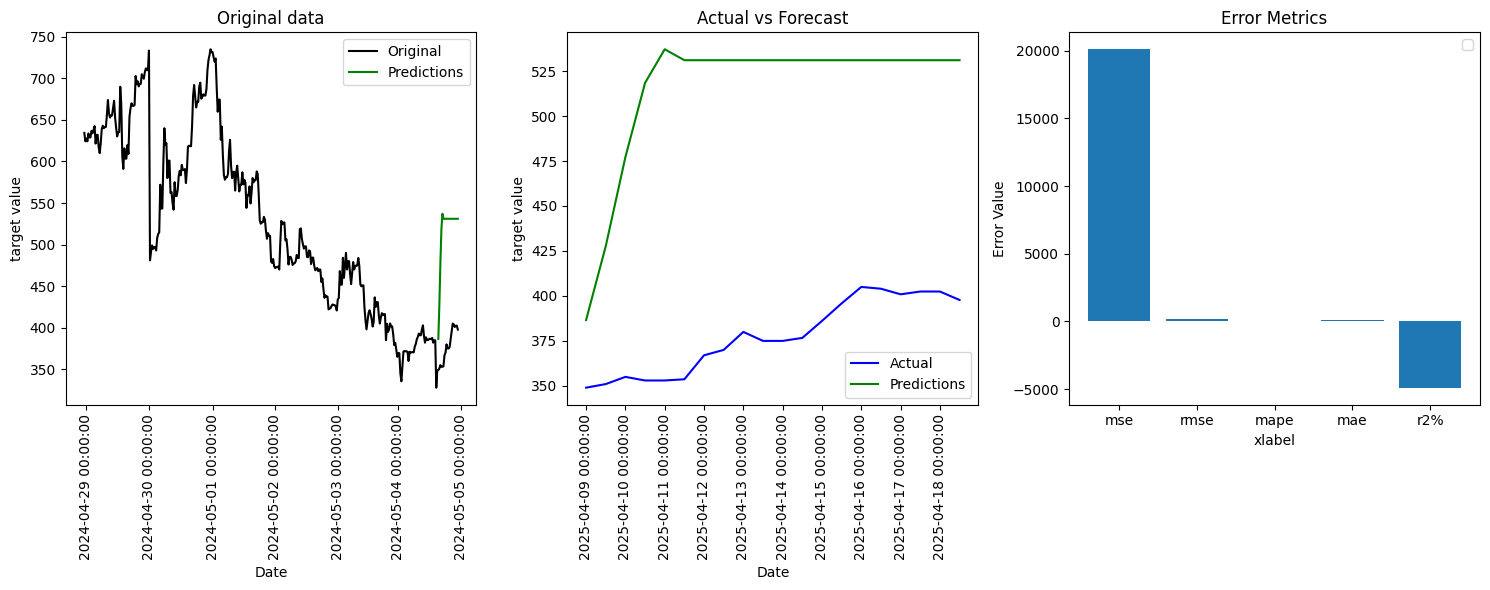

In [9]:
obj_1.data_plotting()

In [7]:
model_fitted = obj_1.optimization(ARIMA,train_df,sub_train_df,val_df) # AR model

(1, 0, 1)


In [8]:
obj_1.predict(train_df, test_df)

(            predictions      actual         mse       rmse      mape  \
 2025-04-09   350.223421  349.000000  131.000482  11.445544  2.296115   
 2025-04-10   352.563081  351.000000  131.000482  11.445544  2.296115   
 2025-04-11   354.872464  355.000000  131.000482  11.445544  2.296115   
 2025-04-12   357.151964  353.000000  131.000482  11.445544  2.296115   
 2025-04-13   359.401965  353.000000  131.000482  11.445544  2.296115   
 2025-04-14   361.622851  353.666667  131.000482  11.445544  2.296115   
 2025-04-15   363.814999  367.000000  131.000482  11.445544  2.296115   
 2025-04-16   365.978779  370.000000  131.000482  11.445544  2.296115   
 2025-04-17   368.114559  380.000000  131.000482  11.445544  2.296115   
 2025-04-18   370.222701  375.000000  131.000482  11.445544  2.296115   
 2025-04-19   372.303563  375.000000  131.000482  11.445544  2.296115   
 2025-04-20   374.357499  376.666667  131.000482  11.445544  2.296115   
 2025-04-21   376.384855  386.100000  131.000482  1

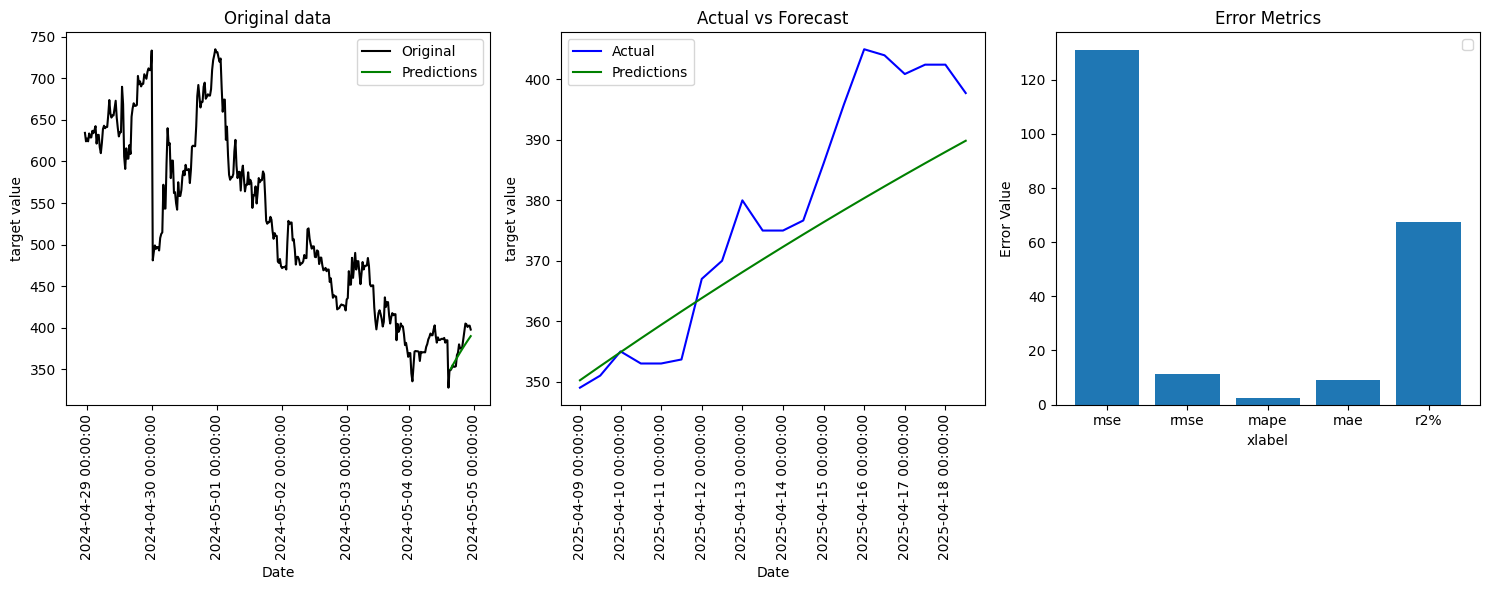

In [12]:
obj_1.data_plotting()

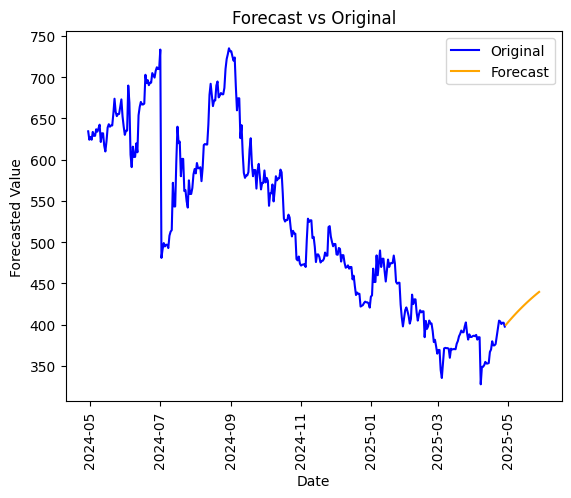

TypeError: ARIMAFamily.fit_model() takes 3 positional arguments but 4 were given

In [12]:
# ARIMA model
obj_1.forecast(ARIMA,data,steps = 30)

### 3) ARMA MODEL 

In [ ]:

obj_1.fit_model(ARIMA,train_df,order=(10,0,15))

In [ ]:
obj_1.predict(train_df, test_df)

            predictions      actual         mse      rmse      mape       mae  \
2025-04-09   353.644043  349.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-10   355.541213  351.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-11   352.030658  355.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-12   355.391447  353.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-13   350.436247  353.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-14   357.290886  353.666667  170.630203  13.06255  2.547372  9.969082   
2025-04-15   362.055803  367.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-16   365.945852  370.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-17   371.351972  380.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-18   369.691729  375.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-19   369.119428  375.000000  170.630203  13.06255  2.547372  9.969082   
2025-04-20   377.743523  376

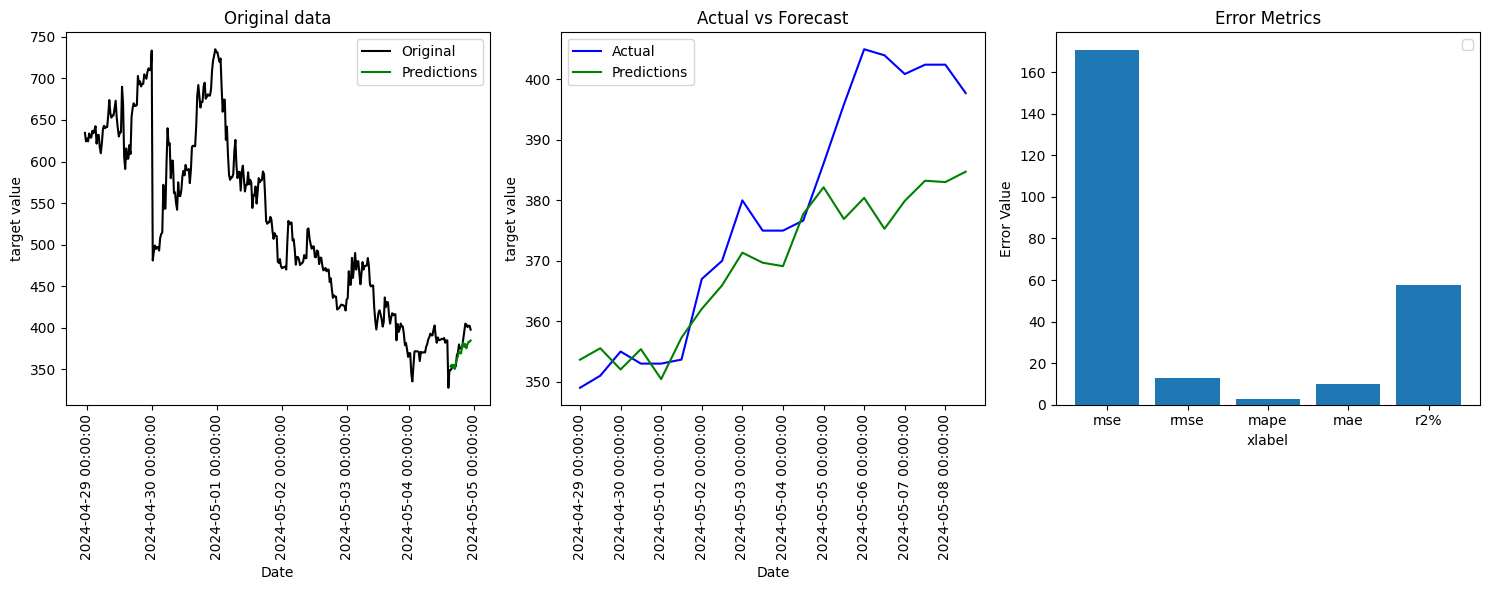

In [ ]:
obj_1.data_plotting()

### 4) ARIMA MODEL

In [ ]:

obj_1.fit_model(ARIMA,train_df,order=(10,1,15))

            predictions      actual         mse       rmse      mape  \
2025-04-09   354.345480  349.000000  557.494957  23.611331  4.895549   
2025-04-10   353.908664  351.000000  557.494957  23.611331  4.895549   
2025-04-11   349.338431  355.000000  557.494957  23.611331  4.895549   
2025-04-12   352.340803  353.000000  557.494957  23.611331  4.895549   
2025-04-13   345.938153  353.000000  557.494957  23.611331  4.895549   
2025-04-14   352.092719  353.666667  557.494957  23.611331  4.895549   
2025-04-15   356.248693  367.000000  557.494957  23.611331  4.895549   
2025-04-16   358.490799  370.000000  557.494957  23.611331  4.895549   
2025-04-17   361.862797  380.000000  557.494957  23.611331  4.895549   
2025-04-18   358.176498  375.000000  557.494957  23.611331  4.895549   
2025-04-19   356.201799  375.000000  557.494957  23.611331  4.895549   
2025-04-20   364.758674  376.666667  557.494957  23.611331  4.895549   
2025-04-21   369.094103  386.100000  557.494957  23.611331  4.89

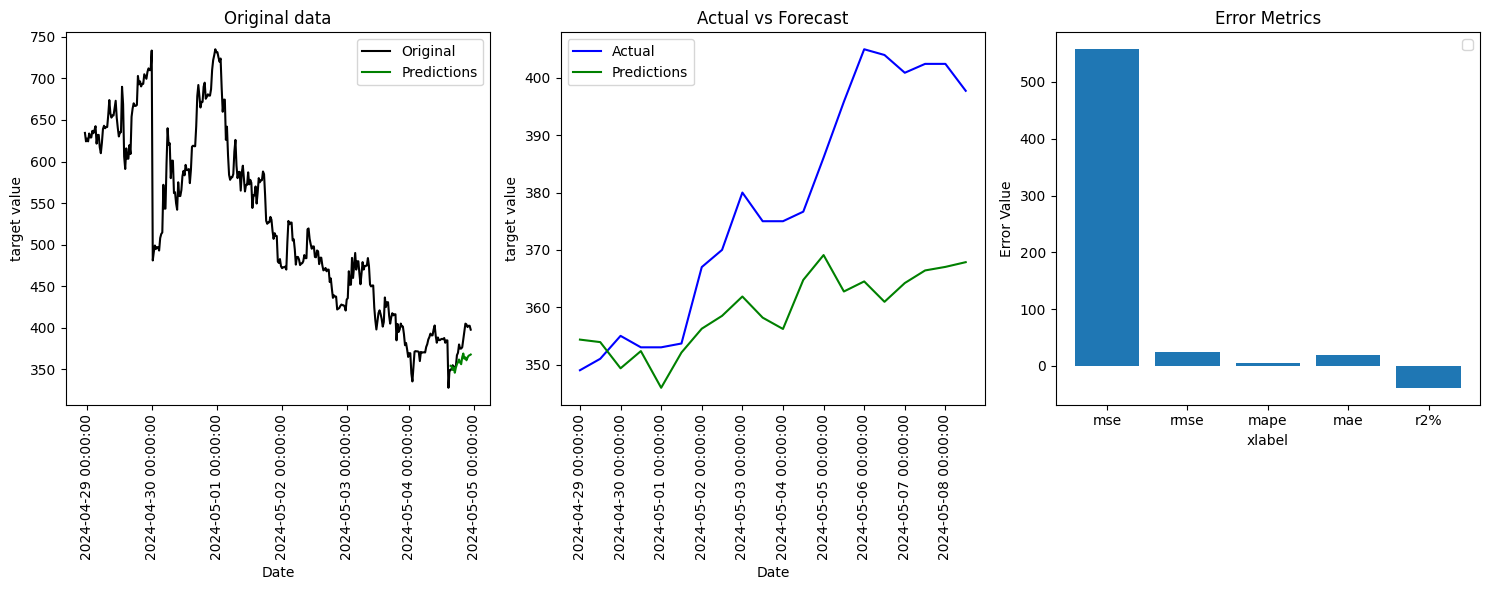

In [ ]:
obj_1.predict(train_df, test_df)
obj_1.data_plotting()